# Read and Process Dataset

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics


In [2]:
#Read csv
df = pd.read_csv("/Users/thamjayshen/Downloads/Data Analyst Case Studies/Unicorn+Companies/Unicorn_Companies.csv")
df

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ..."
1072,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North..."


In [3]:
#Get info on the null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [4]:
#Check the null value for select investors
df[df["Select Investors"].isnull()]

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
629,LinkSure Network,$1B,2015-01-01,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,NaN


In [5]:
#Converting columns to float
def convert_numeric(x):
    x = x.lstrip('$')
    if x[-1] == "B":
        return float(x.rstrip('B'))*10**9
    elif x[-1] == "M":
        return float(x.rstrip('M'))*10**6


df['Funding'] = df['Funding'].apply(convert_numeric)
df['Valuation'] = df['Valuation'].apply(convert_numeric)

In [6]:
df

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.000000e+09,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.000000e+09,"Institutional Venture Partners, Sequoia Capita..."
...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,1.000000e+09,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,3.790000e+08,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,1.000000e+09,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,9.900000e+08,"58.com, Tencent Holdings"
1071,Zihaiguo,1.000000e+09,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,8.000000e+07,"Xingwang Investment Management, China Capital ..."
1072,Zopa,1.000000e+09,2021-10-19,Fintech,London,United Kingdom,Europe,2005,7.920000e+08,"IAG Capital Partners, Augmentum Fintech, North..."


# Which Unicorn have the biggest ROI?

In [7]:
#Get ROI_dataframe
roi_df = df[df["Funding"] > 0] #Filtering away all those 0 and null values

roi_df["ROI"] = roi_df["Valuation"]/roi_df["Funding"] #Getting the ROI by taking valuation/funding

/var/folders/sc/rjvtqltx46n430bjscf2vcgw0000gn/T/ipykernel_27948/2145084179.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  roi_df["ROI"] = roi_df["Valuation"]/roi_df["Funding"] #Getting the ROI by taking valuation/funding


In [8]:
#Get companies with top 10 ROI
top_ten = roi_df.sort_values(by='ROI', ascending = False).head(10)
top_ten = top_ten.set_index("Company")

Text(0.5, 1.0, 'Top 10 Companies ROI')

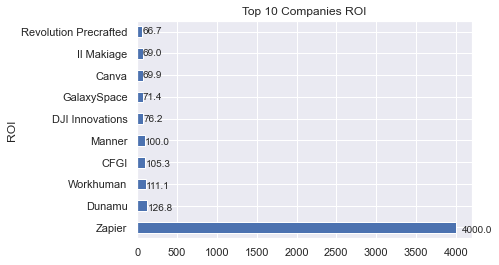

In [9]:
#Plot top 10 ROI companies
fig = plt.figure() 
ax = fig.add_subplot() # Create matplotlib axes

top_ten.ROI.plot.barh()
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_width()), (p.get_width()*1.02, p.get_y()*1.02)) #if the bar is horizontal use this code: ax.annotate('{}'.format(lbls[index]), (p.get_width()*1.01, p.get_y()))

plt.ylabel('ROI')
plt.title('Top 10 Companies ROI')

Zapier had the highest ROI of 4000 times followed by Dunamu and Workhuman

# How long does it usually take for a company to become a unicorn? Has it always been this way?

In [10]:
#Convert Date Joined column into datetime formate
date_df = df.copy()
date_df["Date Joined"] = pd.to_datetime(date_df["Date Joined"])

In [11]:
#Add new column Year_Joined
date_df["Year_Joined"] = date_df["Date Joined"].apply(lambda x: x.year)

In [12]:
#Get Time taken to become a unicorn
date_df["Time_Taken"] = date_df["Year_Joined"] - date_df["Year Founded"]

In [13]:
#Problematic row with date joined being less than the year founded
date_df[date_df["Time_Taken"] <0]

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year_Joined,Time_Taken
714,Yidian Zixun,1.000000e+09,2017-10-17,Mobile & telecommunications,Beijing,China,Asia,2021,151000000.0,"Phoenix New Media, Tianjin Haihe Industry Fund",2017,-4


In [14]:
#Filter away problematic row
date_df = date_df[date_df["Time_Taken"] >=0]

In [15]:
#Get statistical description of the Time taken
date_df["Time_Taken"].describe()

count    1073.000000
mean        7.011184
std         5.321551
min         0.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        98.000000
Name: Time_Taken, dtype: float64

On average it takes around 7 years for a company to become a unicorn. 

## We compare year_founded and time_taken

In [16]:
#We group by year founded to see the average time taken when the company was founded and it became a unicorn
founded_df = date_df.groupby("Year Founded").mean()
founded_df = founded_df.drop(["Year_Joined"], axis = 1)

In [17]:
#Get the time taken for 1919 just for observation since we are going to remove this
print(founded_df.loc[[1919]])


                 Valuation  Funding  Time_Taken
Year Founded                                   
1919          4.000000e+09      0.0        98.0


In [18]:
#we drop 1919 because it is very far from the next datapoint of 1979
founded_df = founded_df.drop(index = 1919)

In [19]:
#Drop irrelevant columns
founded_df = founded_df.drop(["Valuation","Funding"],axis = 1)
founded_df

,Time_Taken
Year Founded,
1979,37.000000
1984,37.000000
1990,27.000000
1991,27.000000
1992,25.000000
1993,28.000000
1994,21.500000
1995,21.500000
1996,25.000000


Text(0, 0.5, 'Average Duration taken to become a unicorn (Year)')

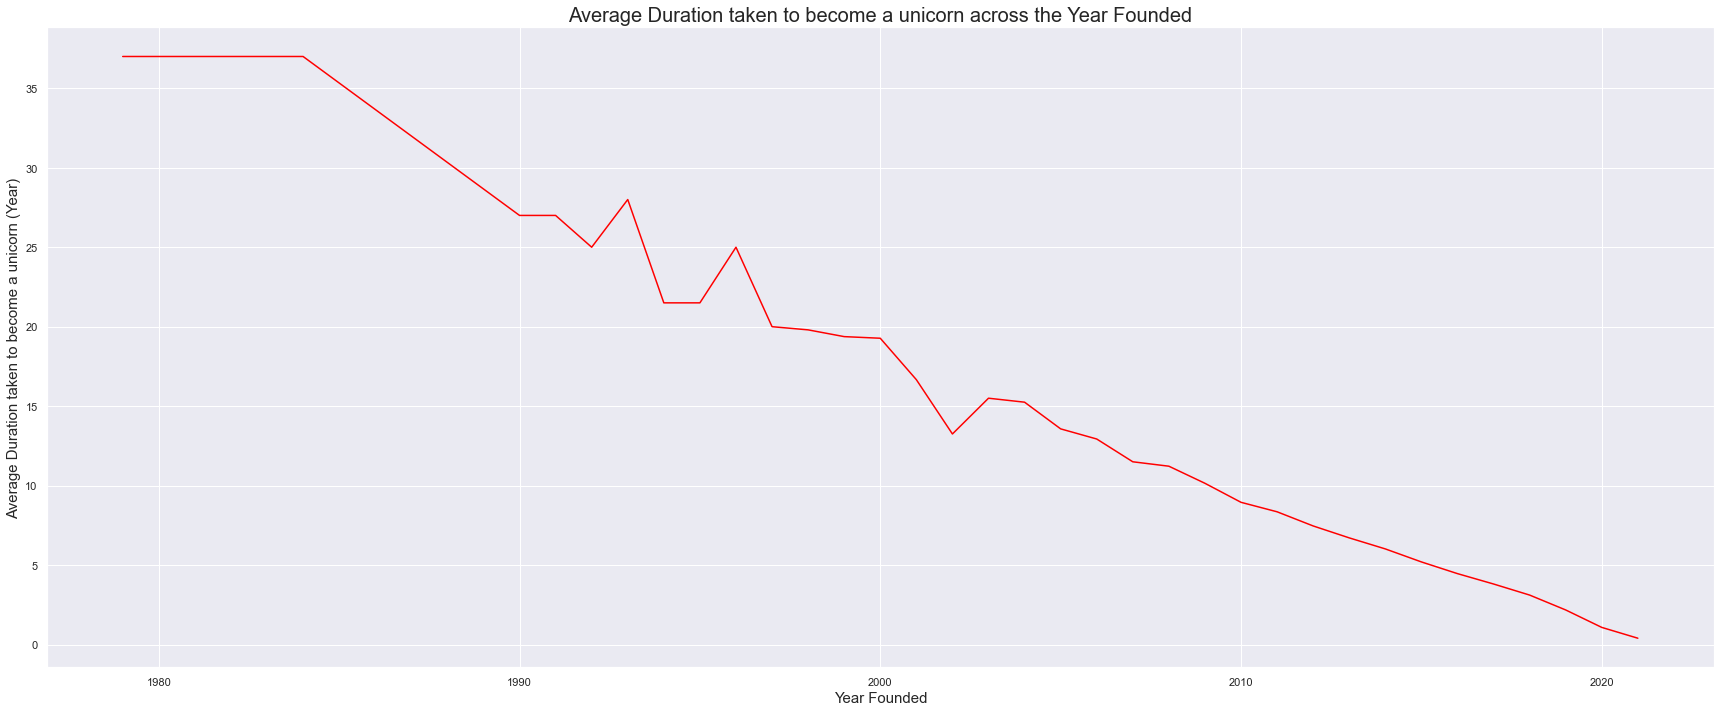

In [20]:
#Plot Graph
plt.rcParams["figure.figsize"] = [24, 10]
plt.rcParams["figure.autolayout"] = True
line1 = plt.plot(founded_df, c='red') #alpha controls the opacity of the line
plt.title("Average Duration taken to become a unicorn across the Year Founded", fontsize = 20)
plt.xlabel("Year Founded", fontsize = 15)
plt.ylabel("Average Duration taken to become a unicorn (Year)", fontsize = 15)

Can be observed that as the companies are more recently established, the average duration taken to become a unicorn decreases almost linearly across time

# Which countries have the most unicorns? Are there any cities that appear to be industry hubs?

## Examine Countries

In [21]:
#Location_df just need 3 columns
location_df = pd.DataFrame(df[["Company","City","Country"]])

In [22]:
#We group by country
country_df = location_df.groupby("Country").count().sort_values(by = "Company", ascending = False)

#Cluster all the other countries apart from the top 15 as "Others"
counter = 0
top = 15
city_others = 0
company_others = 0
for index, val in country_df.iterrows():
    if counter > top:    
        company_others += val[0]
        city_others += val[1]
    counter+=1

In [23]:
#Define a new dataframe to add the "others" field inside
new_df = pd.DataFrame({"Company":[company_others],"City":[city_others],"Country":["others"]})

In [24]:
#Concatenate the table together so we have a dataframe with top 15 countries and "others"
top15_df = pd.concat([country_df.head(15),new_df.set_index("Country")])

In [25]:
top15_df

,Company,City
Country,,
United States,562,562
China,173,173
India,65,65
United Kingdom,43,43
Germany,26,26
France,24,24
Israel,20,20
Canada,19,19
Brazil,16,16


array([<AxesSubplot:ylabel='Company'>, <AxesSubplot:ylabel='City'>],
      dtype=object)

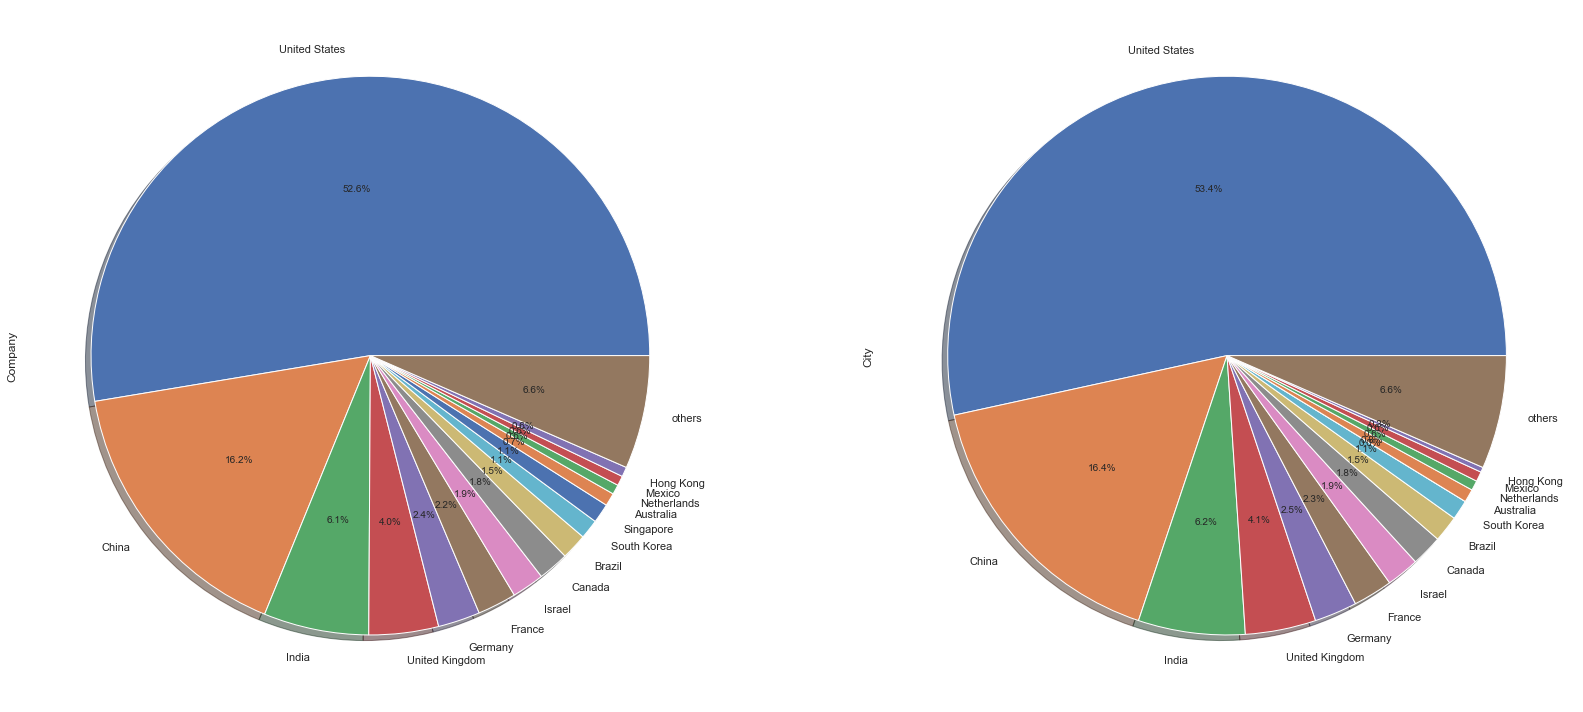

In [26]:
#Get pie chart for Proportion of unicorns per country and per city
top15_df.plot.pie(subplots=True,figsize=(25, 10),autopct='%1.1f%%', shadow = True,legend=False)


Majority of the Unicorns come from the US, followed by China and India.

## Examine Cities within top 3 counties (US, China, India)

In [27]:
#Get data for only top 3 countries (US, China, India)
def filter_func(x):
    if x !="United States" and x!= "China" and x!="India":
        return "others"
    else:
        return x

location_df["Country"] = location_df["Country"].apply(filter_func)
top3_df = location_df[location_df["Country"] != "others"]

array([<AxesSubplot:ylabel='China'>, <AxesSubplot:ylabel='India'>,
       <AxesSubplot:ylabel='United States'>], dtype=object)

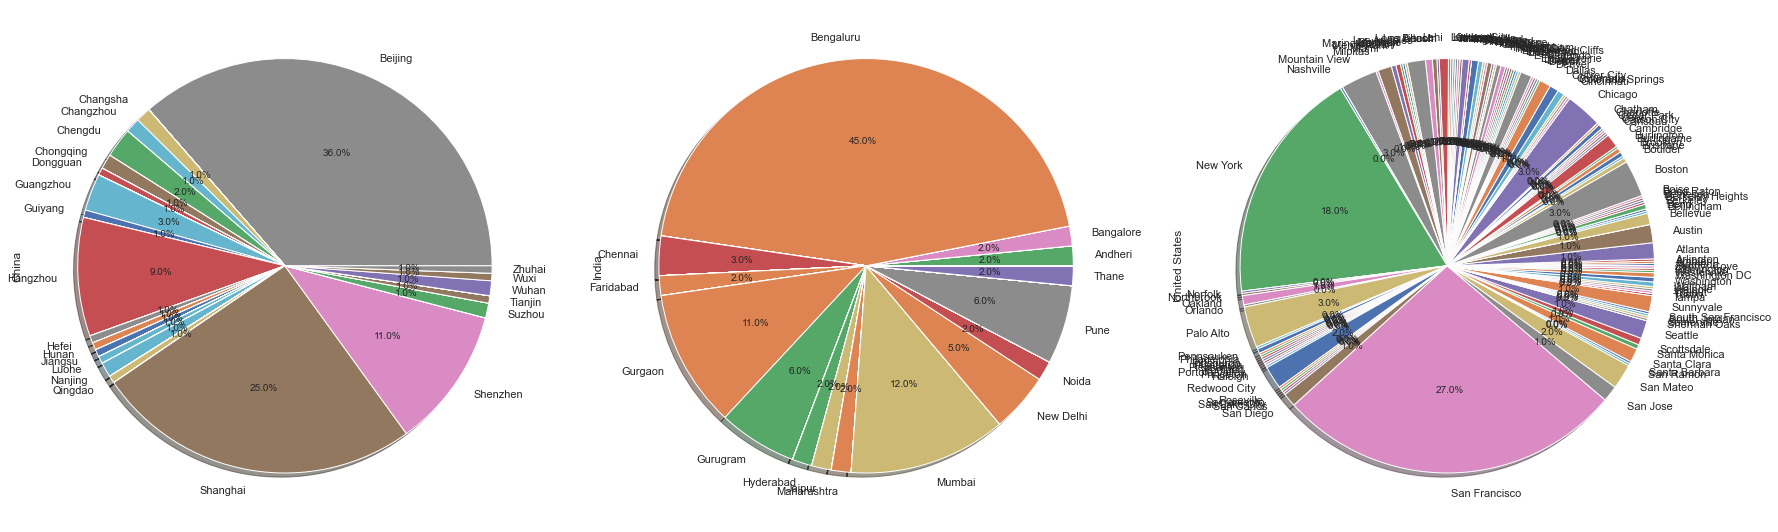

In [28]:
#Get proportion of unicorns for each city within the Top 3 countries
city_df = pd.DataFrame(top3_df[["Country", "City"]])
city_df = city_df.groupby(['City','Country']).size().unstack(fill_value=0)
city_df.plot.pie(subplots=True,figsize=(25, 10),autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '', shadow = True,legend=False) #The explode might need to change depending on how many field u have


array([<AxesSubplot:title={'center':'United States'}, xlabel='City'>],
      dtype=object)

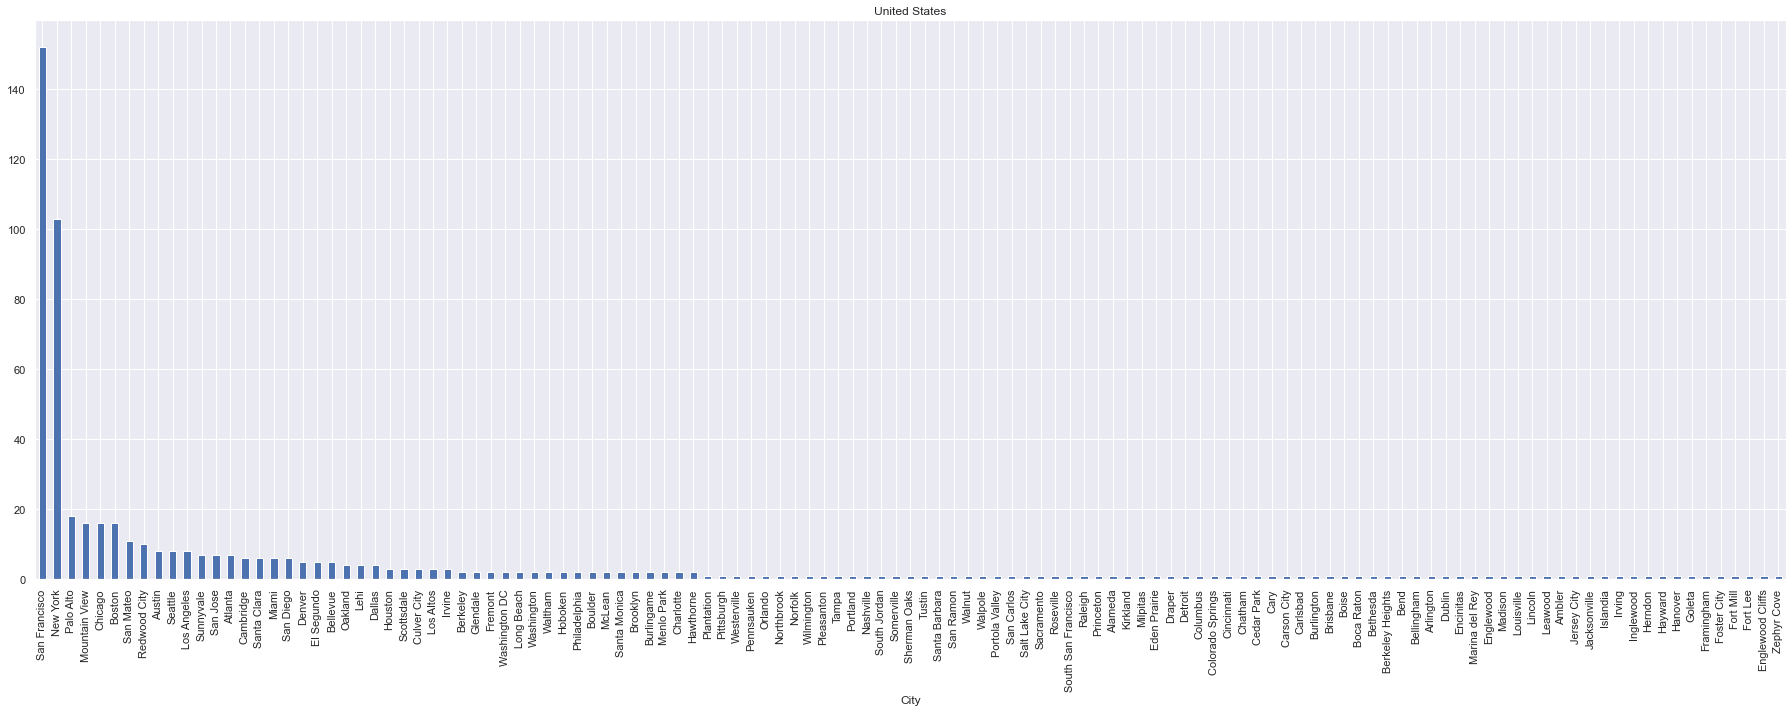

In [29]:
#Count of unicorns in each city within US
us_df = city_df[city_df["United States"]!=0].drop(["India","China"],axis =1).sort_values("United States", ascending = False)
us_df.plot.bar(subplots=True,figsize=(25, 10),legend=False)

array([<AxesSubplot:title={'center':'China'}, xlabel='City'>],
      dtype=object)

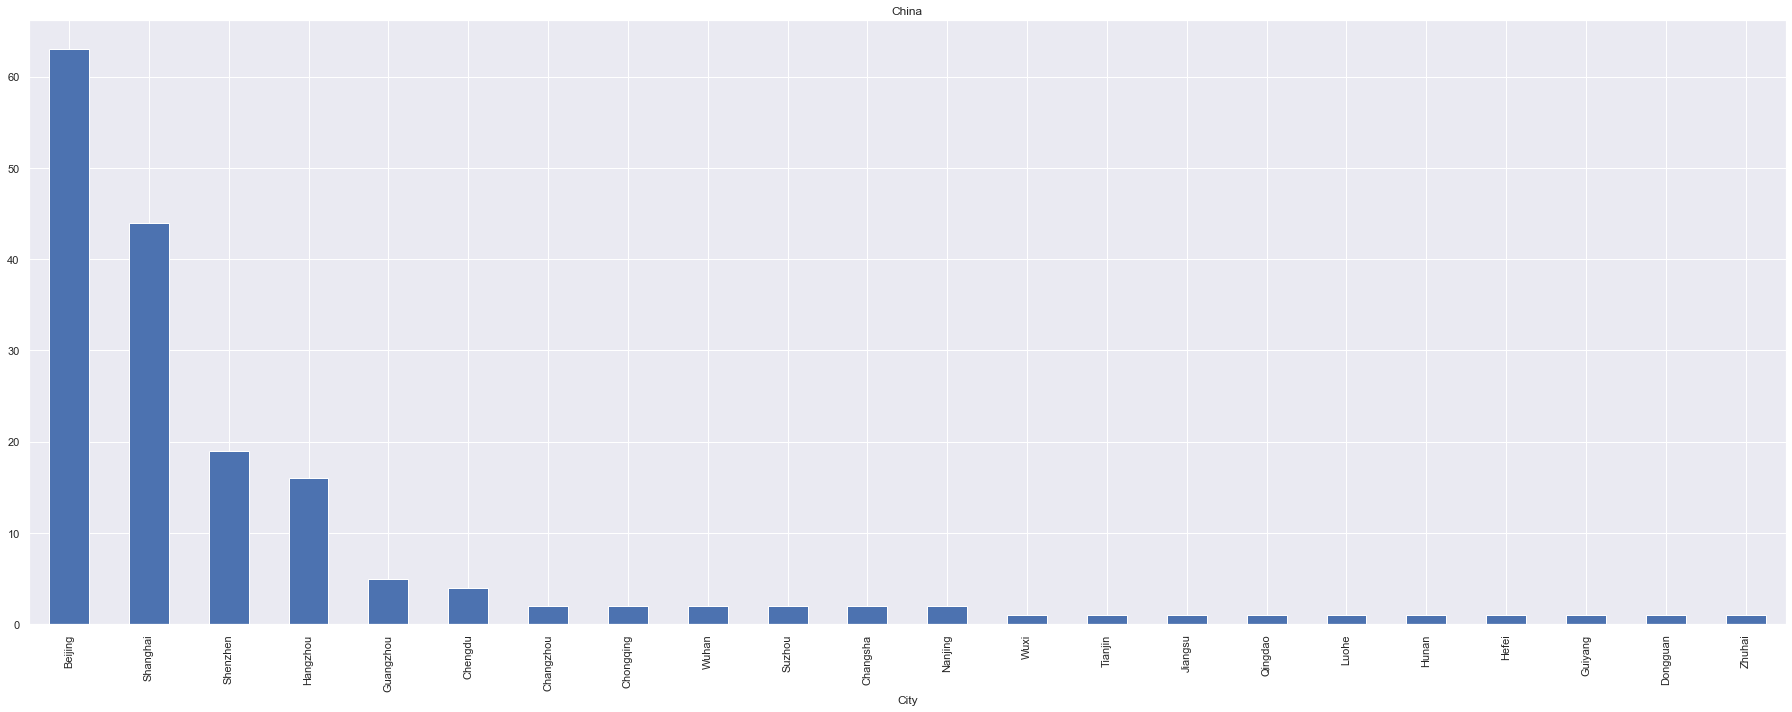

In [30]:
#Count of unicorns in each city within China
china_df = city_df[city_df["China"]!=0].drop(["India","United States"],axis =1).sort_values(by="China", ascending = False)
china_df.plot.bar(subplots=True,figsize=(25, 10),legend=False)


array([<AxesSubplot:title={'center':'India'}, xlabel='City'>],
      dtype=object)

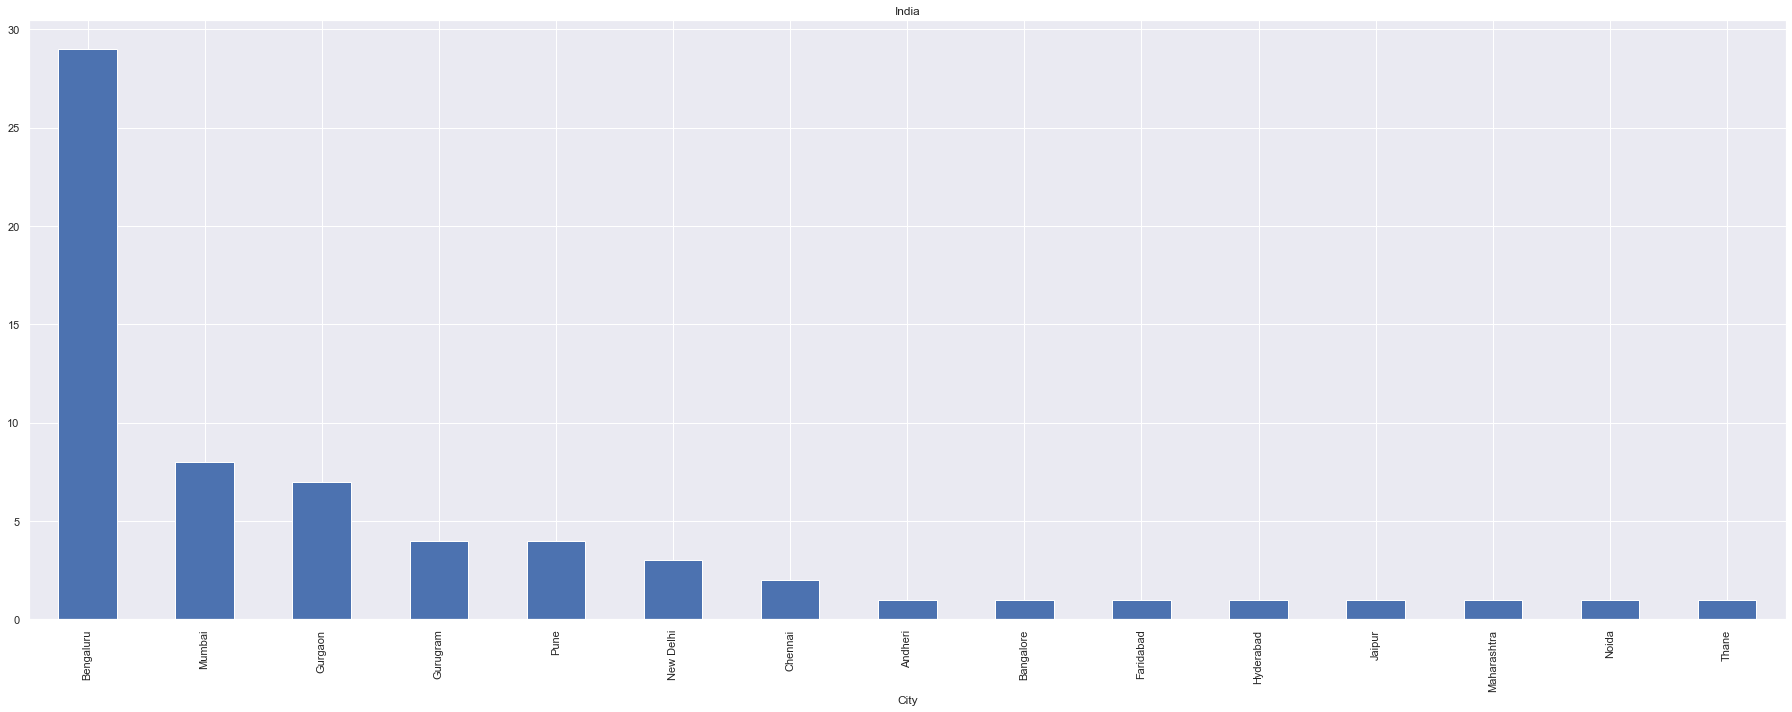

In [31]:
#Count of unicorns in each city within India
india_df = city_df[city_df["India"]!=0].drop(["China","United States"],axis =1).sort_values(by="India", ascending = False)
india_df.plot.bar(subplots=True,figsize=(25, 10),legend=False)

The unicorn hubs for the Top 3 Unicorn producing countries are:
- US: San Francicso, New York
- China: Beijing, Shanghai, Shenzhen
- India: Bengaluru, Mumbai and Gurgaon


# Which investors have funded the most unicorns?

In [32]:
#Split the list of Select Investors into each column by ","
investors_df = df["Select Investors"].str.split(",",expand = True)

#Union all the columns together
invest_df = pd.DataFrame(pd.concat([investors_df[0],investors_df[1],investors_df[2],investors_df[3]]))


In [33]:
#We Strip the spaces behind and after the string in the Investor name, Because after the split there were still spaces
strip_df = pd.DataFrame(invest_df[0].apply(lambda x: str(x).strip()))
strip_df = strip_df.rename(columns = {0:"Investors"}) #rename column
strip_df = strip_df[strip_df["Investors"]!="None"] #filter away investors that are None

In [34]:
strip_df.value_counts().head(10)

Investors                  
Accel                          60
Tiger Global Management        53
Andreessen Horowitz            53
Sequoia Capital China          48
Sequoia Capital                47
Insight Partners               47
Lightspeed Venture Partners    34
SoftBank Group                 34
General Catalyst               34
Index Ventures                 32
dtype: int64

Text(0.5, 1.0, 'Top 10 Investors')

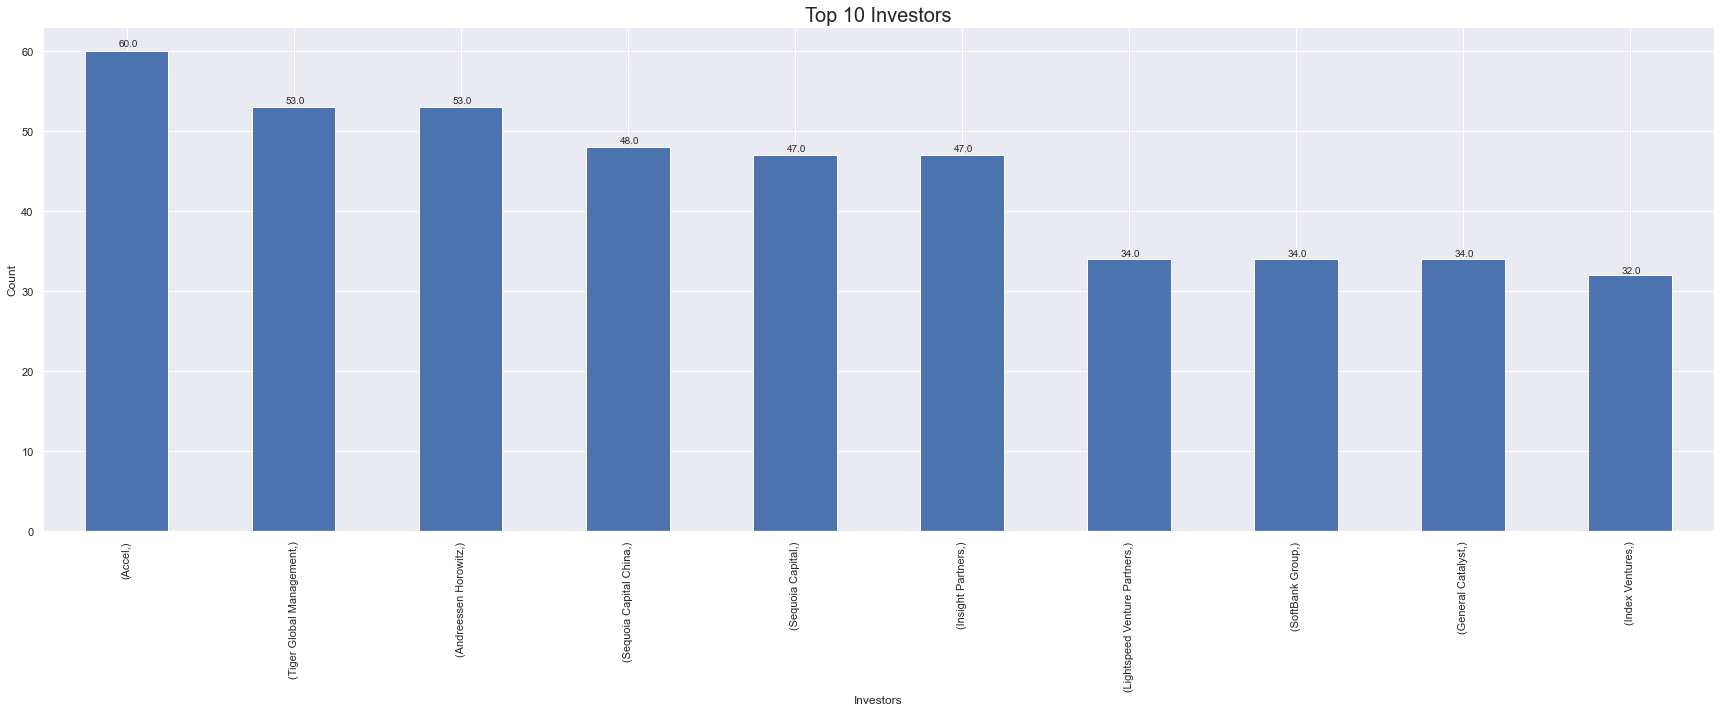

In [35]:
#Plot bar chart for top 10 investors
fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot() # Create matplotlib axes
strip_df.value_counts().head(10).plot.bar(ax=ax)
ax.set_ylabel('Count')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()*1.01)) #if the bar is horizontal use this code: ax.annotate('{}'.format(p.get_width()), (p.get_width()*1.01, p.get_y()))

plt.title("Top 10 Investors", fontsize = 20)

Accel has invested in majority of the companies that turned into unicorns, followed by Tiger Global Management and Andreessen Horowitz. 
